**Brian Blaylock**  
**3 January 2019**

# Sample HRRR climatology from OSG

Can read HDF5 data files with `xarray` or `h5py`.

### Data:
- The sample percentile file is here: `./data/OSG_HRRR_UVGRD_10_m_m11_d08_h18_f00.h5`
    - `OSG`     - stands for Open Science Grid and indicates the computer the statistics were computed on
    - `HRRR`    - stands for the model
    - `UVGRD`   - Variable, wind speed computed from U and V components
    - `10_m`    - Level, 10-meters above ground
    - `m11`     - Month is november
    - `d08`     - Day is the 8th
    - `h18`     - Hour in UTC, 1800 UTC
    - `f00`     - Forecast hour, f00 is the model analysis
    - `.h5`     - HDF5 file type
- Latitude and Longitude file is also provided: `./data/HRRR_latlon.h5`
    - Can also be downloaded from: https://pando-rgw01.chpc.utah.edu/hrrr/HRRR_latlon.h5

---

In [14]:
import matplotlib.pyplot as plt # for making plots

### Using `xarray` to read HDF file
I prefer to open HDF files with xarray. The sample HRRR climatology file is for November 8th, 1800 UTC.

In [15]:
import xarray

In [16]:
x = xarray.open_dataset('./data/OSG_HRRR_UVGRD_10_m_m11_d08_h18_f00.h5')
print(x)

<xarray.Dataset>
Dimensions:         (phony_dim_0: 1059, phony_dim_1: 1799, phony_dim_2: 19)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    Beginning Date  object ...
    Ending Date     object ...
    cores           int64 ...
    count           int64 ...
    mean            (phony_dim_0, phony_dim_1) float32 ...
    p00             (phony_dim_0, phony_dim_1) float64 ...
    p01             (phony_dim_0, phony_dim_1) float64 ...
    p02             (phony_dim_0, phony_dim_1) float64 ...
    p03             (phony_dim_0, phony_dim_1) float64 ...
    p04             (phony_dim_0, phony_dim_1) float64 ...
    p05             (phony_dim_0, phony_dim_1) float64 ...
    p10             (phony_dim_0, phony_dim_1) float64 ...
    p100            (phony_dim_0, phony_dim_1) float64 ...
    p25             (phony_dim_0, phony_dim_1) float64 ...
    p33             (phony_dim_0, phony_dim_1) float64 ...
    p50             (phony_dim_0, phony_dim_1) flo

#### Plot a percentile for the domain
The file `x` has different variables stored in it. `p99` is the 99th percentile for the HRRR domain, `p85` is the 85th percentile, etc.

In [17]:
# load the latitude and longitude file
LL = xarray.open_dataset('./data/HRRR_latlon.h5')
lon = LL['longitude']
lat = LL['latitude']

Text(0.5, 1.0, 'HRRR 99th percentile 10 m wind speed')

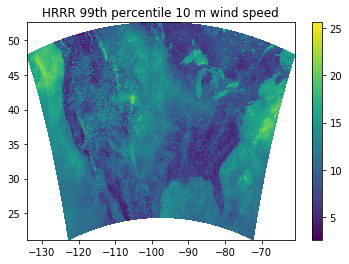

In [17]:
plt.pcolormesh(lon, lat, x['p99'])
plt.colorbar()
plt.title('HRRR 99th percentile 10 m wind speed')

In [18]:
# Remember to close HDF file when finnished
x.close()
LL.close()

---

### Using `h5py` to read HDF file

Alternatively, `h5py` is another package you can use to read HDF files...

In [19]:
import h5py

In [20]:
y = h5py.File('./data/OSG_HRRR_UVGRD_10_m_m11_d08_h18_f00.h5', 'r')

In [21]:
list(y.keys())

['Beginning Date',
 'Ending Date',
 'cores',
 'count',
 'mean',
 'p00',
 'p01',
 'p02',
 'p03',
 'p04',
 'p05',
 'p10',
 'p100',
 'p25',
 'p33',
 'p50',
 'p66',
 'p75',
 'p90',
 'p95',
 'p96',
 'p97',
 'p98',
 'p99',
 'percentile',
 'timer']

In [22]:
y['p99']

<HDF5 dataset "p99": shape (1059, 1799), type "<f8">

Text(0.5, 1.0, 'HRRR 99th percentile 10 m wind speed')

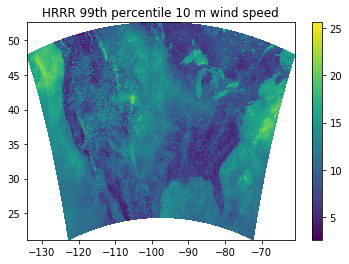

In [23]:
plt.pcolormesh(lon, lat, y['p99'])
plt.colorbar()
plt.title('HRRR 99th percentile 10 m wind speed')

In [24]:
# Remember to close the HDF file when finished
y.close()